# Chapter 2 Notes

## Imports

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable efl


## E2.1 (pg 46 of PDF)

In [5]:
ways = np.array([0, 3, 8, 9, 0])
print(ways/sum(ways))

[0.   0.15 0.4  0.45 0.  ]


## E2.2 (pg 52 of PDF)

In [6]:
stats.binom.pmf(6, 9, 0.5)

0.16406250000000003

## E2.3 (pg 59 of PDF)

In [31]:
p_grid = np.linspace(0, 1, 20)
prior = np.repeat(1, 20)
likelihood = stats.binom.pmf(6, 9, p=p_grid)
unstd_posterior = likelihood * prior
posterior = unstd_posterior / sum (unstd_posterior)

## E2.4 (pg 59 of PDF)

Text(0.5, 1.0, '20 Points')

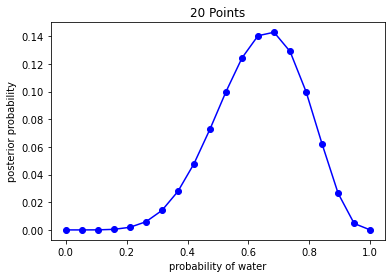

In [32]:
plt.plot(p_grid, posterior, 'bo-')
plt.xlabel('probability of water')
plt.ylabel('posterior probability')
plt.title('20 Points')

## E2.5 (pg 60 of PDF)

In [36]:
# prior2 = np.where(p_grid < 0.5, 0, 1)
prior2 = (p_grid > 0.5) * 1
prior3 = np.exp(-5*np.abs(p_grid - 0.5))

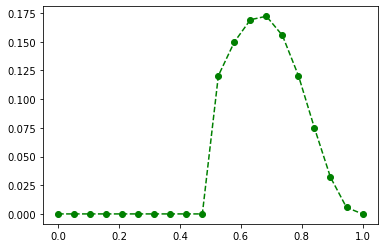

In [37]:
posterior2 = (likelihood * prior2) / sum(likelihood * prior2)
plt.plot(p_grid, posterior2, 'go--')

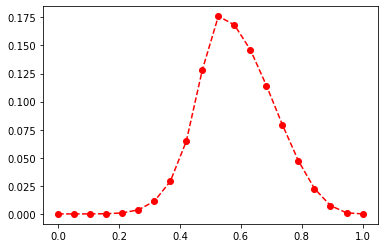

In [35]:
posterior3 = (likelihood * prior3) / sum(likelihood * prior3)
plt.plot(p_grid, posterior3, 'ro--')

## E2.6 (pg 61 of PDF)

### Quadratic Approximation

In [52]:
data = np.repeat((0, 1), (3, 6))
with pm.Model() as normal_approximation:
    p = pm.Uniform("p", 0, 1)  # uniform priors
    w = pm.Binomial("w", n=len(data), p=p, observed=data.sum())  # binomial likelihood
    mean_q = pm.find_MAP() # MAP is the mode of the posterior

    p_value = normal_approximation.rvs_to_values[p]
    p_value.tag.transform = None
    p_value.name = p.name

    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

# display summary of quadratic approximation
print("Mean, Standard deviation\np {:.2}, {:.2}".format(mean_q["p"], std_q[0]))


Mean, Standard deviation
p 0.67, 0.16


### Notes on PyMC option for quadratic approximation
The `pm.find_MAP` function on the model finds the mode of the distribution.  MAP stands for "*Maximum a Priori*".

**QUESTION**:  Need to understand what this block of code is suppose to do?
```
    p_value = normal_approximation.rvs_to_values[p]
    p_value.tag.transform = None
    p_value.name = p.name
    
```

In [47]:
# Compute the 89% percentile interval
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1 - prob) / 2, (1 + prob) / 2])
pi = mean_q["p"] + std_q * z
print("5.5%, 94.5% \n{:.2}, {:.2}".format(pi[0], pi[1]))

5.5%, 94.5% 
0.42, 0.92


## E2.7 (page 62 of PDF)

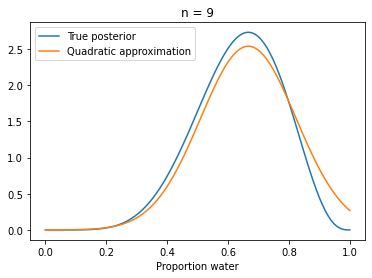

In [56]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, w + 1, n - w + 1), label="True posterior")

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q["p"], std_q), label="Quadratic approximation")
plt.legend(loc=0)

plt.title(f"n = {n}")
plt.xlabel("Proportion water");